## Using profile plotter with Endelave data

- This short tutorial indicates how to create TEM profiles.
- It handles the importing of tTEM, sTEM and borehole data.
- Profile transects can also be supplied as numpy arrays, or can be read from .shp or .csv files

The plotting tool is set around a model object and a plotting object. The model object first needs to be created. In future the model object will also be able to be populated with ERT/NMR/IP model data.

In [1]:
# import necessary packages
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

sys.path.append('../src/profiler')
import profiler as profiler

# set matplotlib font size
font = {'size': 10}
matplotlib.rc('font', **font)

C:\Users\au701230\AppData\Local\Programs\Python\Python39\lib\site-packages\requests-2.26.0-py3.9.egg\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.8) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# set paths to Endelave model files
ttem_path = r"C:\Users\au701230\OneDrive - Aarhus Universitet\Documents\Projects\South Africa\paper\SCI_all_I01_MOD_inv.xyz"

In [3]:
# create model object and import ttem data
model = profiler.Model()

# populate model object with dictionaries of ttem data
# dictionaries are appended into a list, importing a dataset twice will simply append it to the list.
# to remove data sets a new model object can be created

model.loadXYZ(ttem_path, mod_name='SouthAfrica_tTEM', model_type='tTEM')

In [4]:
# write a small function to query the model object
def getModelInfo(model):
    
    print("You have %d tTEM model(s)." % len(model.ttem_models))
    
    print("You have %d sTEM model(s)." % len(model.stem_models))

    for i in range(len(model.ttem_models)):

        print("tTEM model %d has %d sounding(s), each with %d layers." % (i, model.ttem_models[i]['rhos'].shape[0],
                                                                          model.ttem_models[i]['rhos'].shape[1]))
        
    for i in range(len(model.stem_models)):

        print("sTEM model %d has %d sounding(s), each with %d layers." % (i, model.stem_models[i]['rhos'].shape[0],
                                                                          model.stem_models[i]['rhos'].shape[1]))
getModelInfo(model)

You have 1 tTEM model(s).
You have 0 sTEM model(s).
tTEM model 0 has 24342 sounding(s), each with 30 layers.


In [4]:
# TEM data is stored in a dictionary, you can see the information that is stored by doing as as follows
model.ttem_models

[{'instrument': 'TTEM',
  'epsg': 'epsg:32736',
  'mod_name': 'SouthAfrica_tTEM',
  'x': array([470134.831, 470134.131, 470135.103, ..., 468496.194, 468496.19 ,
         468496.19 ]),
  'y': array([6967059.718, 6967062.301, 6967065.86 , ..., 6970153.718,
         6970153.71 , 6970153.704]),
  'elev': array([19. , 19. , 19. , ..., 20.6, 20.6, 20.6]),
  'rhos': array([[ 87.32 ,  98.15 , 114.   , ...,   6.777,   5.089,   5.065],
         [ 83.23 ,  94.38 , 110.1  , ...,   6.462,   4.822,   5.328],
         [ 82.71 ,  94.04 , 109.3  , ...,   7.134,   5.073,   4.897],
         ...,
         [ 40.42 ,  40.04 ,  41.49 , ...,   7.31 ,   1.958,   5.411],
         [ 40.45 ,  39.98 ,  41.37 , ...,   7.145,   2.167,   5.604],
         [ 40.55 ,  39.96 ,  41.42 , ...,   6.941,   2.301,   5.67 ]]),
  'depths': array([[  1.   ,   2.177,   3.564, ...,  84.98 , 101.06 , 120.   ],
         [  1.   ,   2.177,   3.564, ...,  84.98 , 101.06 , 120.   ],
         [  1.   ,   2.177,   3.564, ...,  84.98 , 101

In [5]:
# now we add the walkTEM data, we could also add additional ttem models if we wanted
model.loadXYZ(walktem_path, mod_name='walkTEM_Endelave', model_type='sTEM')
getModelInfo(model) #the name of the instrument is given by the output of workbench

NameError: name 'walktem_path' is not defined

### Adding borehole data
Borehole data can be stored in a text file (.dat) or an excel file (.xlsx).

The .dat file should contain a row for each lithology, should be tab delimited and have the case-sensitive headers:

id | utm_x | utm_y | elev | top_depths | bot_depths | lith_names | colors | lith_descriptions

- id is the borehole name, it can be used to label on the plotted profiles
- utm_x and utm_y are the utm coordinates
- elev is the ground elevation, in most cases this will be ignored by the plotting routine, instead the elevation will be taken from the TEM models 
- top_depths is the top depth of the layer, relative to ground level. That is, the first layer should have a top_depth of 0 m.
- bot_depths is the bottom depth of the layer, again relative to the ground level.
- lith_names is the lithology name
- colors is the color to be used for plotting, standard python colors (https://matplotlib.org/stable/gallery/color/named_colors.html) and hex codes will work.
- the lith_descriptions contain a description of the layer, it can be left empty but the header should be there.

The .xlsx file should have exactly the same headers, but each unique borehole should be placed on a new sheet. See example in data folder.

In [6]:
# as with the tem models, boreholes are appended into a list of dictionaries
# we can clear the boreholes as follows, and reload from the .dat files

model.boreholes = []

# get a list of all the borehole paths
borehole_paths = glob(r"C:\Users\au701230\OneDrive - Aarhus Universitet\Documents\Projects\South Africa\paper"+"/*.dat")

#load from .dat files
model.loadBoreholes(borehole_paths)

In [7]:
# boreholes are also stored as a list of dictionaries, the endelave ones are taken directly from jupiter databases.
model.boreholes[0]

{'id': 118.6,
 'n_layers': 4,
 'x': 581302,
 'y': 6179286,
 'elevation': 0,
 'top_depths': array([0. , 2. , 2.5, 4. ]),
 'bot_depths': array([2. , 2.5, 4. , 9. ]),
 'colors': array(['orange', 'darkgoldenrod', 'yellow', 'yellow'], dtype=object),
 'descriptions': 0    gravel, sand and gravel
 1     clay,  sand and gravel
 2                       sand
 3                       sand
 Name: lith_descriptions, dtype: object,
 'lith_names': array(['gravel', 'clay', 'sand', 'sand'], dtype=object)}

### Adding profile coordinates

The profile data can be stored in a text file (.csv) or an shape file (.shp).

The .csv file should contain a table of utm x and y values, with 'x' and 'y' as headers.

The .shp file should be created in either QGIS or Aarhus Workbench.

In [38]:
prof_coord_paths = glob(r'C:\Users\au701230\OneDrive - Aarhus Universitet\Documents\Projects\South Africa\paper' + '/*.txt')

model.profiles = []
# profile coords are saved as a list of dictionaries
model.loadProfileCoords(prof_coord_paths, file_type='csv')

['C:\\Users\\au701230\\OneDrive - Aarhus Universitet\\Documents\\Projects\\South Africa\\paper\\borehole_section.txt',
 'C:\\Users\\au701230\\OneDrive - Aarhus Universitet\\Documents\\Projects\\South Africa\\paper\\coords.txt',
 'C:\\Users\\au701230\\OneDrive - Aarhus Universitet\\Documents\\Projects\\South Africa\\paper\\n-s section.txt']

In [51]:
# now we will interpolate the ttem data onto the profile using idw.
# we can specify an interpolation radius, this is the maximum distance a point can be from the profile
# model spacing is the lateral discretization of models along the profile in metres.
# ttem model idx is the ttem model we wish to put on our model.
# profile idx is the profile coordinates we want to use, default is all

model.createProfiles(ttem_model_idx=0, profile_idx = [0], interp_radius=40, model_spacing=10) 
model.createProfiles(ttem_model_idx=0, profile_idx = [1], interp_radius=40, model_spacing=25) 
model.createProfiles(ttem_model_idx=0, profile_idx = [2], interp_radius=40, model_spacing=25) 

C:\Users\au701230\OneDrive - Aarhus Universitet\Desktop\pyTEM\pyTEM2\profiler\tutorial\../src/profiler\profiler.py:323: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights, axis=0)


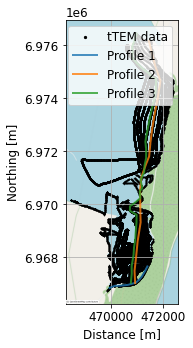

In [39]:
# Now we can create a plot object to plot the models
# background can be 'imagery' or 'osm'
plot = profiler.Plot(model)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

plot.profileMap(ax=ax, background='osm')
#plot.profileMap(ax=ax, background='imagery')

fig.tight_layout()

Borehole 118.6 is 795.387 km from profile, it was not included.
Borehole BH1 is 0.008 km from profile, it was included.
Borehole BH2 is 0.027 km from profile, it was included.


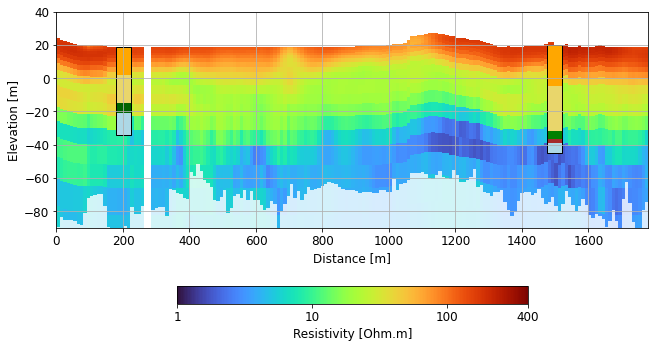

In [53]:
font = {'size': 12}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 1, figsize=(10,5))

scale = 5
vmin=1; vmax=400
plot.TEMProfile(profile_idx=0, cmap=plt.cm.turbo, zmin=-90, zmax=40, ax=ax, scale=scale, cbar_orientation='horizontal', vmax=vmax)

plot.addBoreholes(profile_idx=0, ax=ax, print_msg=True)

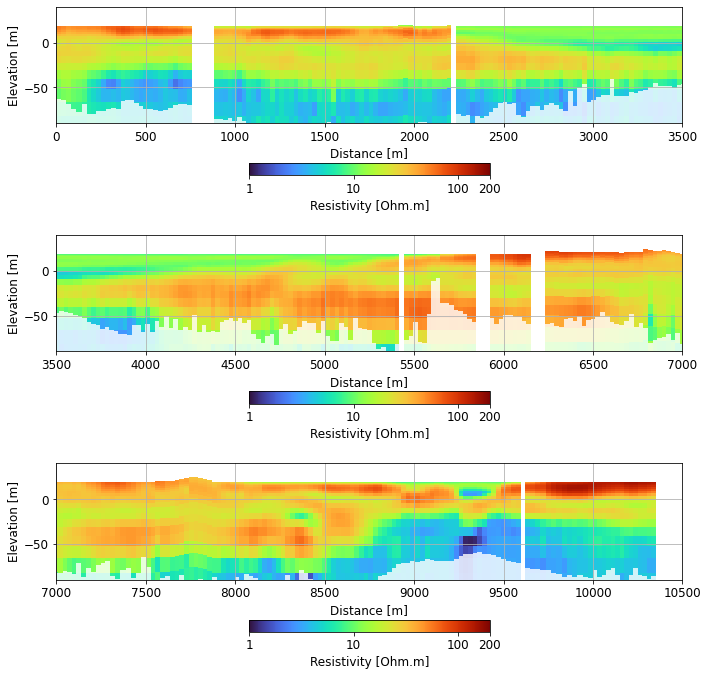

In [50]:
font = {'size': 12}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(3, 1, figsize=(10,10))

scale = 5
vmin=1; vmax=200

plot.TEMProfile(profile_idx=2, cmap=plt.cm.turbo, zmin=-90, zmax=40, ax=axs[0], scale=scale, cbar_orientation='horizontal', vmax=vmax, xmin=0, xmax=3500)
plot.TEMProfile(profile_idx=2, cmap=plt.cm.turbo, zmin=-90, zmax=40, ax=axs[1], scale=scale, cbar_orientation='horizontal', vmax=vmax, xmin=3500, xmax=7000)
plot.TEMProfile(profile_idx=2, cmap=plt.cm.turbo, zmin=-90, zmax=40, ax=axs[2], scale=scale, cbar_orientation='horizontal', vmax=vmax, xmin=7000, xmax=10500)


In [ ]:
# in the plot below we can compare model discretization

fig, axs = plt.subplots(2, 1, figsize=(10,5))
scale = 10
vmin=1; vmax=500

plot.TEMProfile(profile_idx=-2, cmap=plt.cm.turbo, zmin=-90, zmax=10, ax=axs[0], scale=scale, vmax=vmax)
plot.addTEMSoundings(profile_idx=-2, stem_model_idx=0, search_radius=100, ax=axs[0], print_msg=False, vmax=vmax)
plot.addBoreholes(profile_idx=-2, ax=axs[0], print_msg=False)

plot.TEMProfile(profile_idx=-1, cmap=plt.cm.turbo, zmin=-90, zmax=10, ax=axs[1], scale=scale, vmax=vmax)
plot.addTEMSoundings(profile_idx=-1, stem_model_idx=0, search_radius=100, ax=axs[1], print_msg=False, vmax=vmax)
plot.addBoreholes(profile_idx=-1, ax=axs[1], print_msg=False)

In [ ]:
bh_idx = 0
profile_idx = 0
dist_threshold = 100

bh_idxs = []
sounding_idxs = []
for i, bh in enumerate(model.boreholes):
    min_dist, sounding_idx = plot.findNearest(bh, 
                                              model.profiles[profile_idx]['x'], 
                                              model.profiles[profile_idx]['y'])[2:]
    
    if min_dist < dist_threshold:
        bh_idxs.append(i)
        sounding_idxs.append(sounding_idx)

print('%d boreholes were sucessfuly paired with a TEM sounding' % len(bh_idxs))

In [ ]:
if len(bh_idxs) > 4:
    ncols = len(bh_idxs) // 2
    nrows = 2
    fig, axs = plt.subplots(nrows, ncols, figsize=(2*ncols,3*nrows))

else:
    ncols = len(bh_idxs)
    fig, axs = plt.subplots(1, ncols, figsize=(2*ncols,3), sharex=True, sharey=True)

axs = axs.flatten()

for i, ax in enumerate(axs):
    
    plot.TEMSounding(model_type = 'tTEM', model_idx=0, sounding_idx=sounding_idxs[i], ax=ax, vmax=100)

    plot.addBorehole(bh_idx=bh_idxs[i], ax=ax, bh_width=0.17)
    
    #ax.

fig.tight_layout()